In [ ]:
from google.colab import drive
drive.mount('/content/drive')


%cd /content/drive/MyDrive/pixNeRF_shapeNet_v2/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/pixNeRF_shapeNet_v2


In [ ]:
from google.colab import auth
auth.authenticate_user()

# Data fetch

세션 이용 중 임시로 데이터 저장 (코랩용)

# 데이터 구조
```
/<project-root>/data/shapeNetV2/
├── cars_train/
│   ├── <inst_id>/
│   │   ├── intrinsics.txt
│   │   ├── rgb/
│   │   │   ├── 000000.png
│   │   │   ├── 000001.png
│   │   │   └── ...
│   │   └── pose/
│   │       ├── 000000.txt
│   │       ├── 000001.txt
│   │       └── ...
│   └── ...
├── cars_val/
├── cars_test/
├── cars_train_val/
└── cars_train_test/
```

- 폴더 세부 내용
```
inst_id/
├── intrinsics.txt
├── intrinsics/
│   ├── 000000.txt
│   ├── 000001.txt
│   └── ...
├── pose/
│   ├── 000000.txt
│   ├── 000001.txt
│   └── ...
└── rgb/
    ├── 000000.png
    ├── 000001.png
    └── ...
```

- intrinsics.txt 예시
```
525.000000 256.000000 256.000000 0.
0. 0. 0.
1.
512 512
```

- intrinsics/000000.txt 예시
```
525.0 0.0 256.0 0.0 525.0 256.0 0.0 0.0 1.0
```

- pose/000000.txt 예시
```
-0.5042614340782166 -0.37587812542915344 0.7774547934532166 -1.0106911659240723 -0.8635510206222534 0.21949009597301483 -0.4539864957332611 0.5901824235916138 -5.960464477539063e-08 -0.9002998471260071 -0.43527036905288696 0.5658514499664307 0.0 0.0 -0.0 1.0
```

rgb/000000.png 예시 
: /content/drive/MyDrive/Datasets/shapeNetV2_cars/shapeNet_example.png


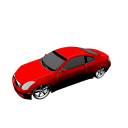

In [ ]:
from IPython.display import Image, display
import os

image_path = '/content/drive/MyDrive/Datasets/shapeNetV2_cars/shapeNet_example.png'

if os.path.exists(image_path):
    print(f"- rgb/000000.png 예시 \n: {image_path}")
    try:
        display(Image(filename=image_path))
    except Exception as e:
        print(f"오류: 파이썬에서 이미지를 표시하는 데 실패했습니다. 오류 메시지: {e}")
        print("혹시 이미지 파일이 손상되었거나, 지원되지 않는 형식일 수 있습니다.")
else:
    print(f"오류: 이미지 '{image_path}'을(를) 찾을 수 없습니다. 경로를 다시 확인해주세요.")


# 버켓 -> colab : Data fetch

In [ ]:
# Usage: bash scripts/fetch2local.sh -from <bucket/prefix> [-to <extract_path>]
#       -to : /content/pixNeRF_shapeNet_v2_data [DEFAULT]
!bash scripts/fetch2local.sh -from nerf-data-ssu/shapeNetV2_cars

Pixel-NeRF GCS Fetcher (Dual Path Mode)
------------------------------------------
BUCKET   : nerf-data-ssu
PREFIX   : shapeNetV2_cars
SOURCE   : gs://nerf-data-ssu/shapeNetV2_cars
ZIP SAVE : /content/load_data
EXTRACT  : /content/pixNeRF_shapeNet_v2_data
⚠️ Skipping Colab auth (not detected or already authenticated).
🔍 Scanning for ZIP files in gs://nerf-data-ssu/shapeNetV2_cars...
📦 Found 5 ZIP files:
gs://nerf-data-ssu/shapeNetV2_cars/cars_test.zip
gs://nerf-data-ssu/shapeNetV2_cars/cars_train.zip
gs://nerf-data-ssu/shapeNetV2_cars/cars_train_test.zip
gs://nerf-data-ssu/shapeNetV2_cars/cars_train_val.zip
gs://nerf-data-ssu/shapeNetV2_cars/cars_val.zip
------------------------------------------
⬇️ Downloading ZIP files to /content/load_data...
Skipping existing item: file:///content/load_data/cars_test.zip
Skipping existing item: file:///content/load_data/cars_train.zip
Skipping existing item: file:///content/load_data/cars_train_test.zip
Skipping existing item: file:///content/load_

# 초기 세팅 : index format

- 인덱싱 포맷
```
{
  "img": "cars_train/<inst>/rgb/000000.png",
  "K": [131.25, 0.0, 64.0, 0.0, 131.25, 64.0, 0.0, 0.0, 1.0],
  "c2w": [
    [-0.9129449725, -2.6523e-07, -0.4080819487, 0.5305066704],
    [ 0.4080819487, -4.6272e-07, -0.9129451513, 1.1868288517],
    [ 0.0,          -0.9999998807, 0.0,          1.9678e-07],
    [ 0.0,           0.0,           0.0,          1.0]
  ],
  "inst": "105dedf1b70c2826b2dcc642c86ae8f4"
}
```

### prebuild 파일 업로드
- GCS 업로드

In [ ]:
!bash scripts/prebuild_index.sh \
    -data /content/pixNeRF_shapeNet_v2_data \
    -bucket nerf-data-ssu \
    -prefix shapeNetV2_cars

🧱 Building Pixel-NeRF JSONL Indexes (Upload-only)
------------------------------------------
DATA ROOT : /content/pixNeRF_shapeNet_v2_data
OUTPUT DIR: /content/pixNeRF_shapeNet_v2_data/prebuilt_splits
GCS TARGET: gs://nerf-data-ssu/shapeNetV2_cars/splits
cars_train: 100% 2152/2152 [05:22<00:00,  6.68it/s]
✅ cars_train: 2152 instances
cars_val: 100% 353/353 [00:47<00:00,  7.40it/s]
✅ cars_val: 353 instances
cars_test: 100% 705/705 [02:02<00:00,  5.76it/s]
✅ cars_test: 705 instances
cars_train_val: 100% 2152/2152 [00:16<00:00, 131.37it/s]
✅ cars_train_val: 2152 instances
cars_train_test: 100% 2152/2152 [05:30<00:00,  6.50it/s]
✅ cars_train_test: 2152 instances
⏱ Done in 841.3s
☁️ Uploading to gs://nerf-data-ssu/shapeNetV2_cars/splits ...
Copying file:///content/pixNeRF_shapeNet_v2_data/prebuilt_splits/cars_train.jsonl [Content-Type=application/octet-stream]...
Copying file:///content/pixNeRF_shapeNet_v2_data/prebuilt_splits/cars_val.jsonl [Content-Type=application/octet-stream]...
Copyin

- 메타 데이터 확인

In [ ]:
import json, subprocess, os, pathlib, tempfile

# ------------------------------------------------------
# 🔧 설정
# ------------------------------------------------------
BUCKET = "nerf-data-ssu"
PREFIX = "shapeNetV2_cars/splits"
REMOTE_PATH = f"gs://{BUCKET}/{PREFIX}"
LOCAL_DATA = pathlib.Path("/content/pixNeRF_shapeNet_v2_data/")  # 압축해제된 데이터 경로

print("==========================================")
print("🔍 Pixel-NeRF Split Consistency Checker (Meta vs Actual Images)")
print("------------------------------------------")
print(f"BUCKET  : {BUCKET}")
print(f"PREFIX  : {PREFIX}")
print(f"LOCAL   : {LOCAL_DATA}")
print("==========================================")

# ------------------------------------------------------
# 1️⃣ summary_meta.json 로드
# ------------------------------------------------------
tmp_meta = tempfile.NamedTemporaryFile(delete=False).name
subprocess.run(["gsutil", "cp", f"{REMOTE_PATH}/summary_meta.json", tmp_meta],
               check=False, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

if not os.path.exists(tmp_meta):
    raise FileNotFoundError("❌ summary_meta.json not found in bucket")

with open(tmp_meta) as f:
    meta = json.load(f)
splits_meta = meta.get("splits", {})

# ------------------------------------------------------
# 2️⃣ GCS JSONL 파일 목록 & 라인 수 계산
# ------------------------------------------------------
def count_gcs_lines(gcs_uri):
    cmd = f"gsutil cat {gcs_uri} | wc -l"
    res = subprocess.run(cmd, shell=True, capture_output=True, text=True)
    try:
        return int(res.stdout.strip())
    except:
        return 0

res = subprocess.run(["gsutil", "ls", f"{REMOTE_PATH}/*.jsonl"], capture_output=True, text=True)
files = [x.strip() for x in res.stdout.splitlines() if x.strip()]

# ------------------------------------------------------
# 3️⃣ 로컬 폴더 내 이미지 수 계산
# ------------------------------------------------------
def count_local_images(split_path: pathlib.Path):
    total_imgs, total_insts = 0, 0
    if not split_path.exists():
        return (0, 0)
    for inst in split_path.iterdir():
        rgb_dir = inst / "rgb"
        if rgb_dir.exists():
            imgs = list(rgb_dir.glob("*.png"))
            total_imgs += len(imgs)
            total_insts += 1
    return (total_insts, total_imgs)

# ------------------------------------------------------
# 4️⃣ 결과 비교 출력
# ------------------------------------------------------
print(f"{'Split':20s} {'MetaInst':>10s} {'LocalImgs':>12s} {'JSONLLines':>12s} {'Δ(Line-Imgs)':>14s}")
print("-" * 70)

total_jsonl, total_imgs = 0, 0
for gcs_uri in files:
    split = os.path.basename(gcs_uri).replace(".jsonl", "")
    jsonl_lines = count_gcs_lines(gcs_uri)
    meta_inst = splits_meta.get(split, 0)

    local_inst, local_imgs = count_local_images(LOCAL_DATA / split)
    diff = jsonl_lines - local_imgs

    total_jsonl += jsonl_lines
    total_imgs += local_imgs

    print(f"{split:20s} {meta_inst:10,d} {local_imgs:12,d} {jsonl_lines:12,d} {diff:14,d}")

print("-" * 70)
print(f"✅ Total images: {total_imgs:,} | Total JSONL lines: {total_jsonl:,}")
print(f"Δ(total): {total_jsonl - total_imgs:,}")
print("==========================================")

🔍 Pixel-NeRF Split Consistency Checker (Meta vs Actual Images)
------------------------------------------
BUCKET  : nerf-data-ssu
PREFIX  : shapeNetV2_cars/splits
LOCAL   : /content/pixNeRF_shapeNet_v2_data
Split                  MetaInst    LocalImgs   JSONLLines   Δ(Line-Imgs)
----------------------------------------------------------------------
cars_test                   705      176,704      176,704              0
cars_train                2,152      537,642      537,642              0
cars_train_test           2,152      539,901      539,901              0
cars_train_val            2,152       21,510       21,510              0
cars_val                    353       88,352       88,352              0
----------------------------------------------------------------------
✅ Total images: 1,364,109 | Total JSONL lines: 1,364,109
Δ(total): 0


# rewrite
- index format : local에 맞게 rewrite

In [ ]:
#   bash scripts/rewrite_index.sh \
#        -from nerf-data-ssu/shapeNetV2_cars/splits \
#        -to <data_folder_root>
!bash scripts/rewrite_index.sh \
   -from nerf-data-ssu/shapeNetV2_cars/splits \
   -to /content/pixNeRF_shapeNet_v2_data # 로컬 데이터 폴더 위치

Pixel-NeRF Split Rewriter (Force Overwrite)
  REMOTE BASE  : gs://nerf-data-ssu/shapeNetV2_cars/splits
  DATA ROOT    : /content/pixNeRF_shapeNet_v2_data
  LOCAL SPLITS : /content/pixNeRF_shapeNet_v2_data/splits
  SUMMARY META : /content/pixNeRF_shapeNet_v2_data/splits/summary_meta.json
> Found 5 JSONL files.
 summary_meta.json loaded.
------------------------------------------
- Split: cars_test
⬇ Downloading cars_test.jsonl ...
> Replace prefix:
   gs://nerf-data-ssu/shapeNetV2_cars/
   ⬇
   /content/pixNeRF_shapeNet_v2_data/
- Rewritten: /content/pixNeRF_shapeNet_v2_data/splits/cars_test.jsonl
> Validating (sample up to 300)...
> cars_test: 176704 lines | Missing(sample): 0 | Non-image(sample): 0 | JSON errors(sample): 0
------------------------------------------
- Split: cars_train
⬇ Downloading cars_train.jsonl ...
> Replace prefix:
   gs://nerf-data-ssu/shapeNetV2_cars/
   ⬇
   /content/pixNeRF_shapeNet_v2_data/
- Rewritten: /content/pixNeRF_shapeNet_v2_data/splits/cars_train.jso

# 이용 예시

1. fetch to local
```
# Usage: bash scripts/fetch2local.sh -from <bucket/prefix> [-to <extract_path>]
#       -to : /content/pixNeRF_shapeNet_v2_data [DEFAULT]
!bash scripts/fetch2local.sh -from nerf-data-ssu/shapeNetV2_cars
```

2. Rewrite index
```
!bash scripts/rewrite_index.sh \
   -from nerf-data-ssu/shapeNetV2_cars/splits \
   -to /content/pixNeRF_shapeNet_v2_data # 로컬 데이터 폴더 위치
```